In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
(X_Train,_), (_,_) = mnist.load_data()

In [3]:
print(X_Train.shape)

(60000, 28, 28)


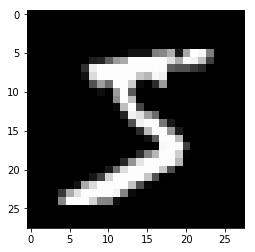

In [4]:
plt.imshow(X_Train[0], cmap='gray')
plt.show()

In [5]:
# Normalize This Data [-1,1]

X_Train = (X_Train.astype('float32') - 127.5) / 127.5

print(np.min(X_Train))
print(np.max(X_Train))
print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [6]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH = 128 # int(NO_OF_BATCHES / 2)
NOISE_DIM = 100 # Upsample into 784 Dimension Vector
adam = Adam(lr=2e-4, beta_1=0.5)

Instructions for updating:
Colocations handled automatically by placer.


### Generator

In [7]:
# Input Noise (100 dimension) and Outputs a Vector (784 dimension)

generator = Sequential()
generator.add(Dense(256, input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

### Discriminator

In [8]:
# Downscaling

discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

discriminator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


### < GAN >

In [9]:
# GAN (Step-2)
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input, gan_output)
model.compile(loss='binary_crossentropy', optimizer=adam)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [10]:
X_Train = X_Train.reshape((-1,784))
print(X_Train.shape)

(60000, 784)


In [11]:
def save_images(epoch, samples=100):
    
    noise = np.random.normal(0,1,size=(samples, NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i], interpolation='nearest', cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Instructions for updating:
Use tf.cast instead.


C:\Users\HP\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 -> Discriminator Loss : 0.6465 & Generator Loss : 0.9523
Epoch 2 -> Discriminator Loss : 0.6346 & Generator Loss : 1.0482
Epoch 3 -> Discriminator Loss : 0.6321 & Generator Loss : 1.1242
Epoch 4 -> Discriminator Loss : 0.6169 & Generator Loss : 1.1518
Epoch 5 -> Discriminator Loss : 0.5986 & Generator Loss : 1.2315


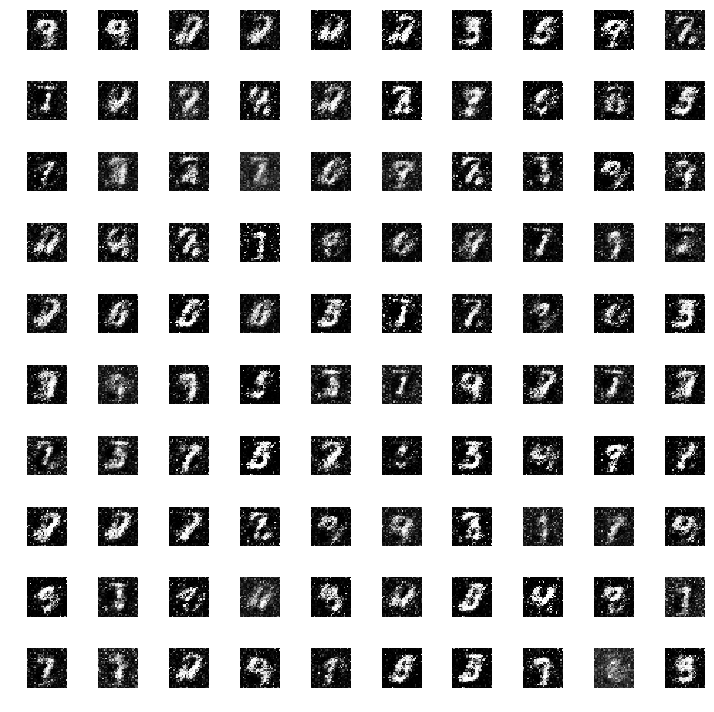

Epoch 6 -> Discriminator Loss : 0.5744 & Generator Loss : 1.3054
Epoch 7 -> Discriminator Loss : 0.5648 & Generator Loss : 1.3217
Epoch 8 -> Discriminator Loss : 0.5618 & Generator Loss : 1.3464
Epoch 9 -> Discriminator Loss : 0.5788 & Generator Loss : 1.2697
Epoch 10 -> Discriminator Loss : 0.5706 & Generator Loss : 1.2870


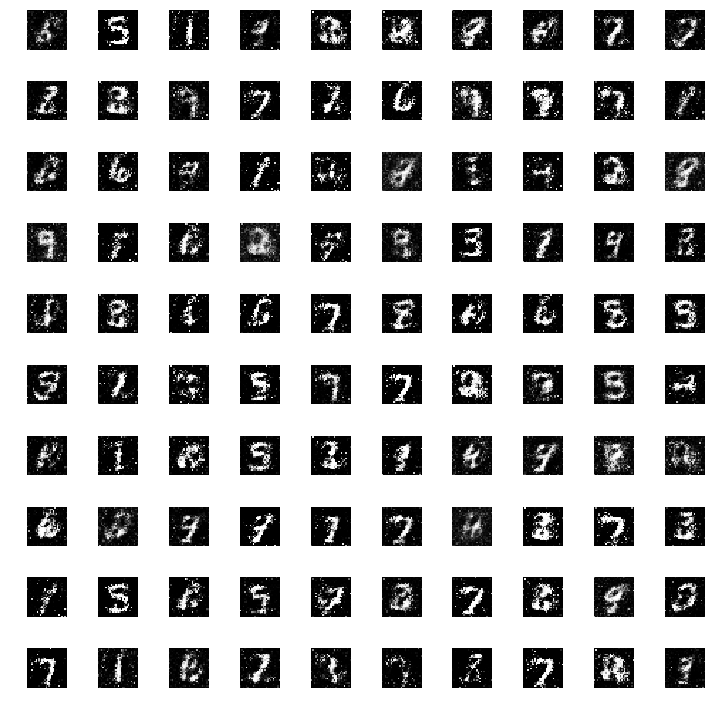

Epoch 11 -> Discriminator Loss : 0.6019 & Generator Loss : 1.1957
Epoch 12 -> Discriminator Loss : 0.6193 & Generator Loss : 1.1201
Epoch 13 -> Discriminator Loss : 0.6305 & Generator Loss : 1.0820
Epoch 14 -> Discriminator Loss : 0.6314 & Generator Loss : 1.0818
Epoch 15 -> Discriminator Loss : 0.6335 & Generator Loss : 1.0695


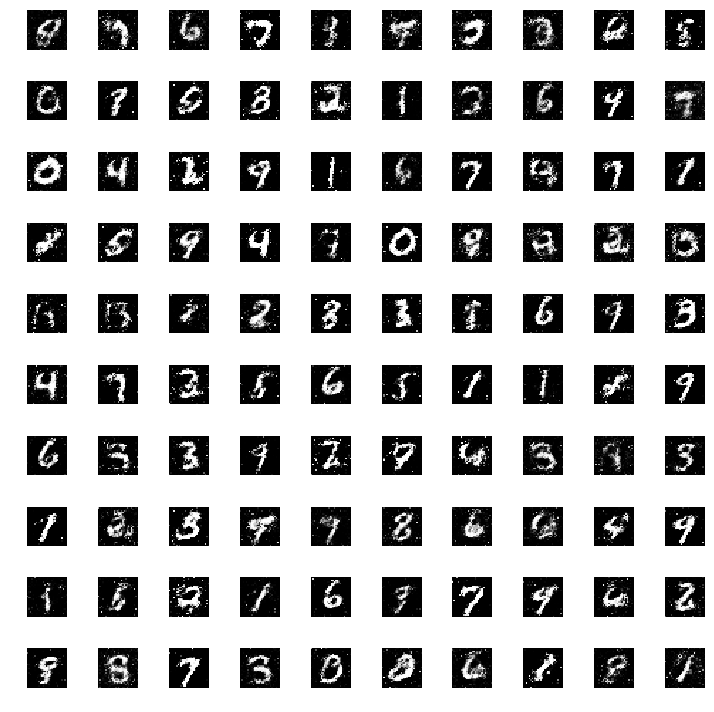

Epoch 16 -> Discriminator Loss : 0.6404 & Generator Loss : 1.0511
Epoch 17 -> Discriminator Loss : 0.6446 & Generator Loss : 1.0327
Epoch 18 -> Discriminator Loss : 0.6472 & Generator Loss : 1.0263
Epoch 19 -> Discriminator Loss : 0.6480 & Generator Loss : 1.0284
Epoch 20 -> Discriminator Loss : 0.6490 & Generator Loss : 1.0222


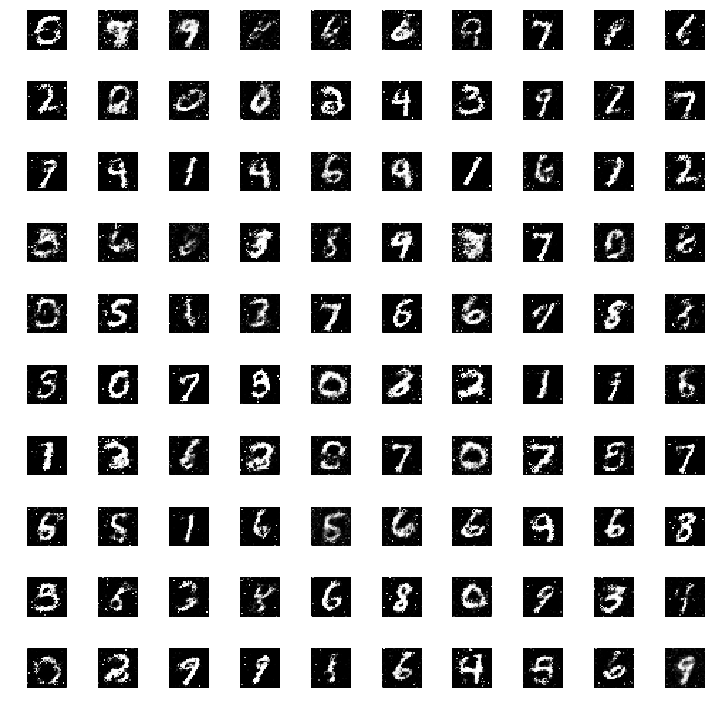

Epoch 21 -> Discriminator Loss : 0.6507 & Generator Loss : 1.0188
Epoch 22 -> Discriminator Loss : 0.6539 & Generator Loss : 1.0187
Epoch 23 -> Discriminator Loss : 0.6553 & Generator Loss : 1.0100
Epoch 24 -> Discriminator Loss : 0.6562 & Generator Loss : 1.0093
Epoch 25 -> Discriminator Loss : 0.6594 & Generator Loss : 1.0061


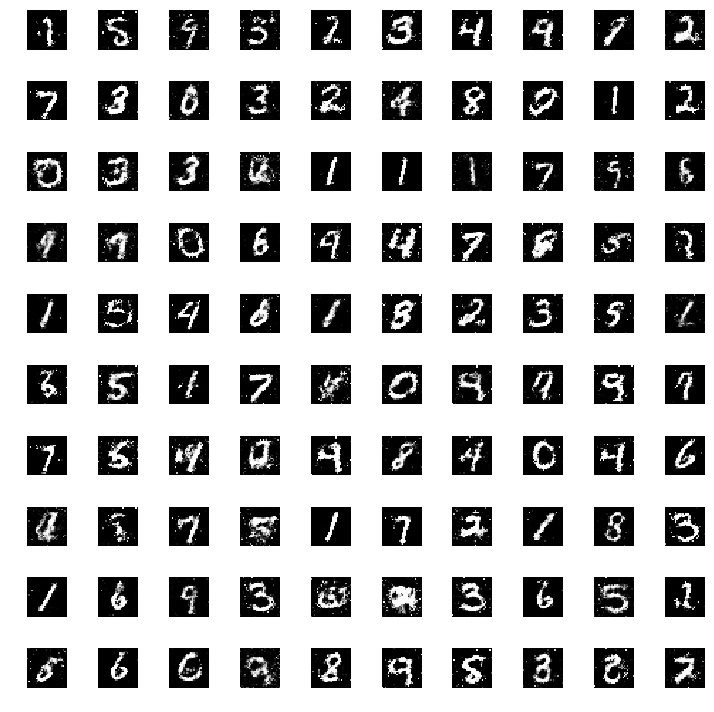

Epoch 26 -> Discriminator Loss : 0.6592 & Generator Loss : 1.0154
Epoch 27 -> Discriminator Loss : 0.6584 & Generator Loss : 1.0085
Epoch 28 -> Discriminator Loss : 0.6595 & Generator Loss : 1.0077
Epoch 29 -> Discriminator Loss : 0.6598 & Generator Loss : 1.0029
Epoch 30 -> Discriminator Loss : 0.6598 & Generator Loss : 1.0051


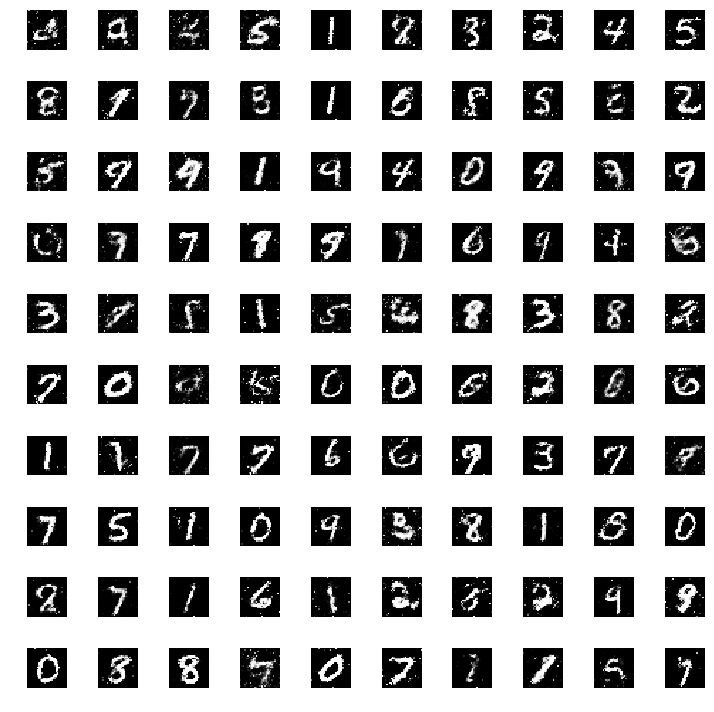

Epoch 31 -> Discriminator Loss : 0.6602 & Generator Loss : 1.0003
Epoch 32 -> Discriminator Loss : 0.6618 & Generator Loss : 0.9906
Epoch 33 -> Discriminator Loss : 0.6635 & Generator Loss : 0.9905
Epoch 34 -> Discriminator Loss : 0.6623 & Generator Loss : 0.9915
Epoch 35 -> Discriminator Loss : 0.6639 & Generator Loss : 0.9915


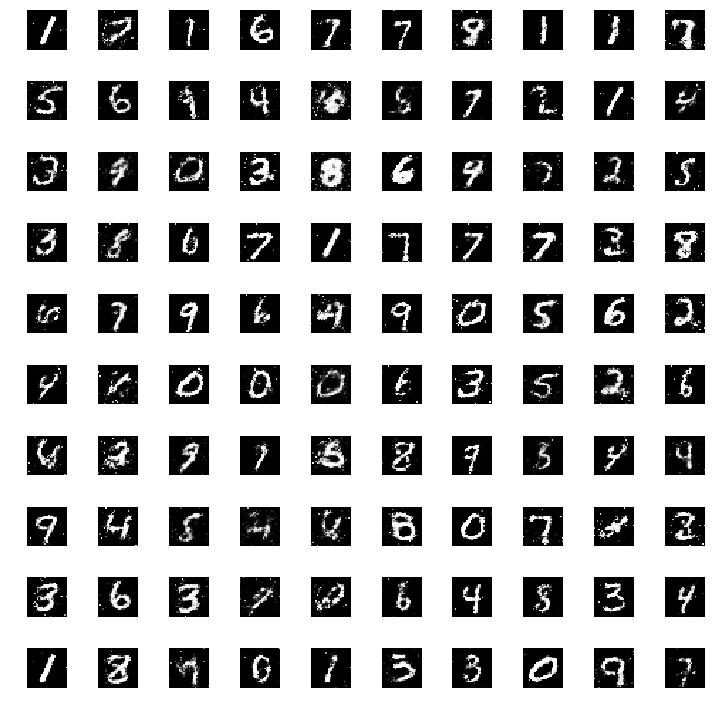

Epoch 36 -> Discriminator Loss : 0.6639 & Generator Loss : 0.9990
Epoch 37 -> Discriminator Loss : 0.6640 & Generator Loss : 0.9902
Epoch 38 -> Discriminator Loss : 0.6641 & Generator Loss : 0.9912
Epoch 39 -> Discriminator Loss : 0.6635 & Generator Loss : 0.9933
Epoch 40 -> Discriminator Loss : 0.6644 & Generator Loss : 0.9896


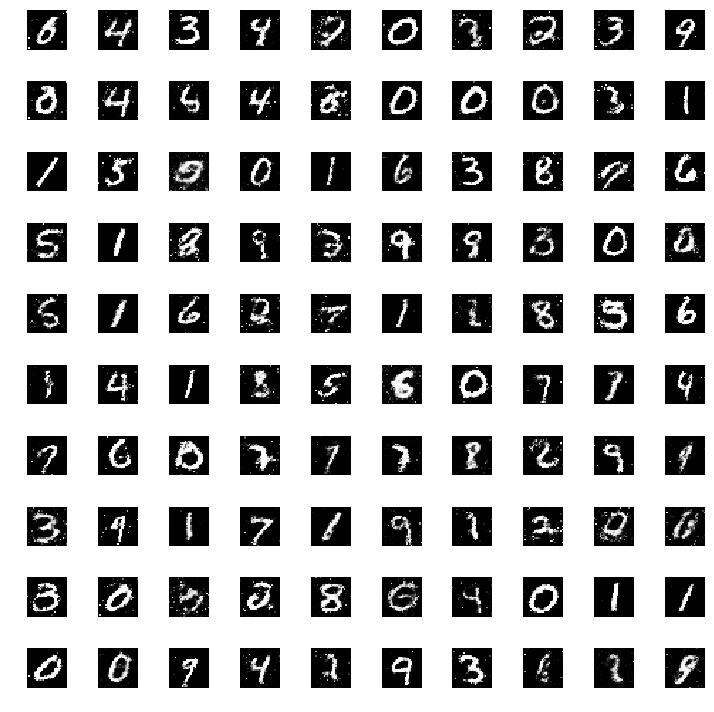

Epoch 41 -> Discriminator Loss : 0.6659 & Generator Loss : 0.9865
Epoch 42 -> Discriminator Loss : 0.6662 & Generator Loss : 0.9866
Epoch 43 -> Discriminator Loss : 0.6655 & Generator Loss : 0.9847
Epoch 44 -> Discriminator Loss : 0.6654 & Generator Loss : 0.9943
Epoch 45 -> Discriminator Loss : 0.6654 & Generator Loss : 0.9864


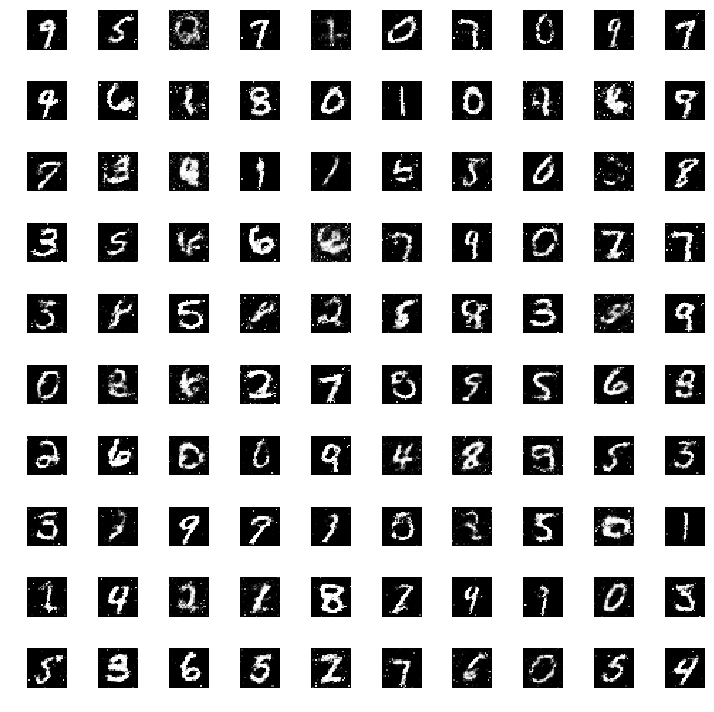

Epoch 46 -> Discriminator Loss : 0.6660 & Generator Loss : 0.9911
Epoch 47 -> Discriminator Loss : 0.6659 & Generator Loss : 0.9865
Epoch 48 -> Discriminator Loss : 0.6650 & Generator Loss : 0.9909
Epoch 49 -> Discriminator Loss : 0.6667 & Generator Loss : 0.9792
Epoch 50 -> Discriminator Loss : 0.6657 & Generator Loss : 0.9903


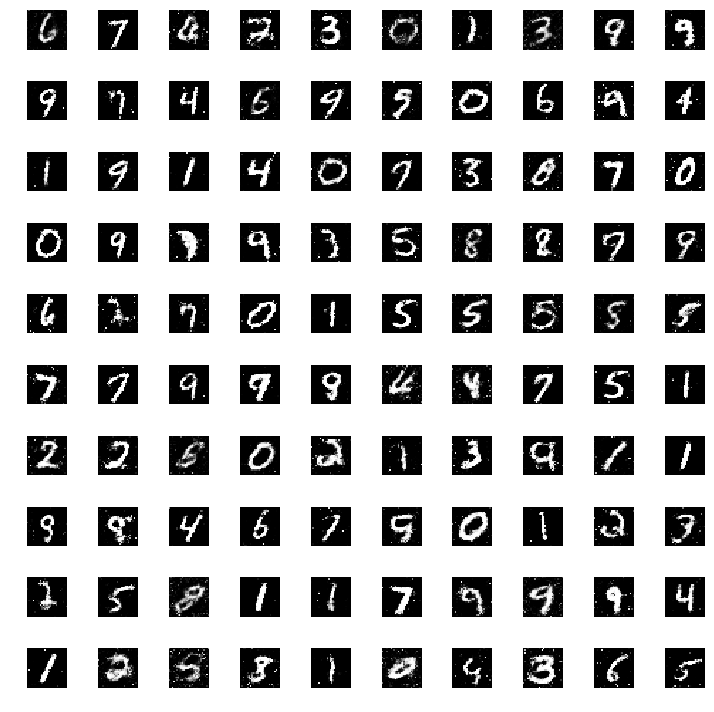

In [12]:
# Training Loop
d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    
    # Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator
        # 50% Real Data + 50% Fake Data
        
        # Real Data X
        # idx = np.random.randint(low, high, no_of_numbers)
        idx = np.random.randint(0, X_Train.shape[0], HALF_BATCH)
        real_imgs = X_Train[idx]
        
        # Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH, NOISE_DIM))
        fake_imgs = generator.predict(noise) # Forward
        
        # Labels
        real_y = np.ones((HALF_BATCH, 1)) * 0.9 # One sided label smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH, 1))
        
        # Train our Discriminator
        
        d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)
        d_loss = (0.5 * d_loss_real) + (0.5 * d_loss_fake)
        
        epoch_d_loss += d_loss
        
        # Step-2 : Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE, NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise, ground_truth_y)
        epoch_g_loss += g_loss
    
    print("Epoch %d -> Discriminator Loss : %.4f & Generator Loss : %.4f"%((epoch+1),(epoch_d_loss/NO_OF_BATCHES),(epoch_g_loss/NO_OF_BATCHES)))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if(epoch+1)%5 == 0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_images(epoch)

In [13]:
# !zip -r /content/images.zip /content/images

In [14]:
# from google.colab import files
# files.download('images.zip')

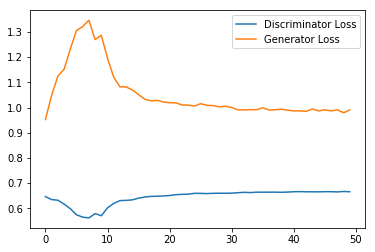

In [16]:
plt.plot(d_losses,label="Discriminator Loss")
plt.plot(g_losses,label="Generator Loss")
plt.legend()
plt.show()